In [13]:
import scanpy as sc
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
import matplotlib.pyplot as plt

from GraphST import GraphST

datadir = '/data1/shahs3/users/mezallj1/data/osmfish'#dataset path
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#memory=[1,2,3,4,5,6,7,8,9,10]
#during_time=[1,2,3,4,5,6,7,8,9,10]
#ari_list=[1,2,3,4,5,6,7,8,9,10]

# the location of R, which is necessary for mclust algorithm. Please replace it with local R installation path
os.environ['R_HOME'] ='/home/mezallj1/miniconda3/envs/graphst/lib/R'

In [14]:
adata = sc.read_h5ad(f'{datadir}/raw/osmfish_remove_excluded.h5ad')

In [15]:
# the number of clusters
n_clusters = 11

In [16]:
adata.var_names_make_unique()

In [17]:
# define and train model
model = GraphST.GraphST(adata, device=device)
adata = model.train()

/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Begin to train ST data...


100%|██████████| 600/600 [00:04<00:00, 124.09it/s]

Optimization finished for ST data!


In [18]:
# set radius to specify the number of neighbors considered during refinement
radius = 50

In [19]:
# clustering
from GraphST.utils import clustering
clustering(adata, n_clusters, radius=radius, refinement=False) #For DLPFC dataset, we use optional refinement step.

fitting ...
  |======================================================================| 100%


In [20]:
obs_df = adata.obs.dropna()

In [21]:
obs_df['domain'].unique()
obs_df['Region'].unique()

['Layer 6', 'Internal Capsule Caudoputamen', 'Layer 4', 'White matter', 'Layer 2-3 medial', ..., 'Layer 5', 'Layer 3-4', 'Layer 2-3 lateral', 'Pia Layer 1', 'Ventricle']
Length: 11
Categories (11, object): ['Hippocampus', 'Internal Capsule Caudoputamen', 'Layer 2-3 lateral', 'Layer 2-3 medial', ..., 'Layer 6', 'Pia Layer 1', 'Ventricle', 'White matter']

In [22]:
# calculate metric ARI
ari = metrics.adjusted_rand_score(obs_df['domain'], obs_df['Region'])
print('ARI:', ari)

ARI: 0.3827999498322055


In [23]:
adata.obs

,ClusterName,ClusterID,Region,mclust,domain
cell_778,Inhibitory_CP,18,Layer 6,2,2
cell_1409,Inhibitory_CP,18,Internal Capsule Caudoputamen,11,11
cell_3642,Inhibitory_CP,18,Layer 4,6,6
cell_1302,Inhibitory_CP,18,Internal Capsule Caudoputamen,11,11
cell_1285,Inhibitory_CP,18,Internal Capsule Caudoputamen,11,11
...,...,...,...,...,...
cell_6462,Vascular_Smooth_Muscle,25,Layer 6,5,5
cell_260,Vascular_Smooth_Muscle,25,Layer 2-3 lateral,6,6
cell_4446,Vascular_Smooth_Muscle,25,White matter,4,4
cell_6431,Vascular_Smooth_Muscle,25,Layer 6,2,2


In [24]:
obs_df['Region']

cell_778                           Layer 6
cell_1409    Internal Capsule Caudoputamen
cell_3642                          Layer 4
cell_1302    Internal Capsule Caudoputamen
cell_1285    Internal Capsule Caudoputamen
                         ...              
cell_6462                          Layer 6
cell_260                 Layer 2-3 lateral
cell_4446                     White matter
cell_6431                          Layer 6
cell_5462                      Hippocampus
Name: Region, Length: 4839, dtype: category
Categories (11, object): ['Hippocampus', 'Internal Capsule Caudoputamen', 'Layer 2-3 lateral', 'Layer 2-3 medial', ..., 'Layer 6', 'Pia Layer 1', 'Ventricle', 'White matter']

/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/mezallj1/miniconda3/envs/graphst/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:381: UserWarning: No data for c

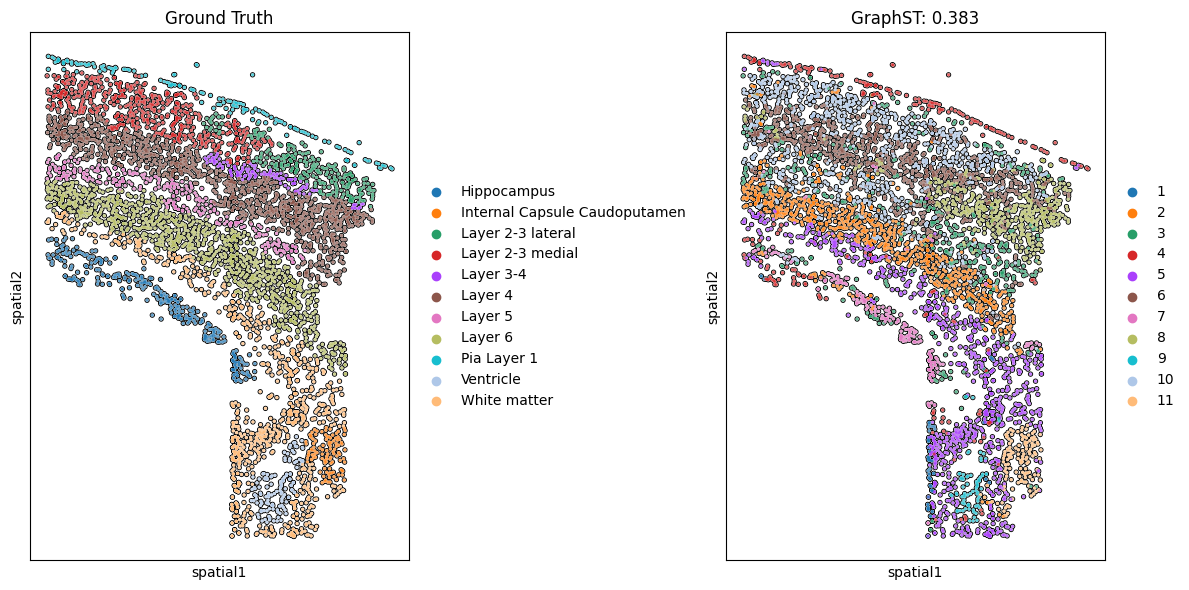

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sc.pl.embedding(adata, basis='spatial', title = 'Ground Truth', color='Region', ax=axes[0], s=20, add_outline=True, show=False)
sc.pl.embedding(adata, basis='spatial', title = 'GraphST: %.3f'%(ari), color ='domain', ax=axes[1], s=20, add_outline=True, show=False)
plt.tight_layout()
plt.show()

In [52]:
adata.var_keys()

['highly_variable',
 'highly_variable_rank',
 'means',
 'variances',
 'variances_norm',
 'mean',
 'std']

In [51]:
adata.write(f"{datadir}/osmfish_graphst.h5ad")

In [ ]:






    

   

   


    ari_list[i]=ari
    print('ARI:{}'.format(ari_list[i]))

    end_time=time.time()
    during=end_time-start_time
  
    size, peak = tracemalloc.get_traced_memory()

    tracemalloc.stop()
    
    memory[i]=peak /1024/1024
    during_time[i]=during
    

    print('memory blocks peak:{:>10.4f} MB'.format(memory[i]))
    print('time: {:.4f} s'.format(during_time[i]))
    
    domain=adata.obs['domain'].tolist()
    new_data.obs['pred_{}'.format(i+1)]=domain
    new_data.obs['pred_{}'.format(i+1)]=new_data.obs['pred_{}'.format(i+1)].astype('category')
    


result_path='./'
new_data.uns['time']=during_time
new_data.uns['memory']=memory
new_data.uns['ari']=ari_list
new_data.write(f'{result_path}/DeepST_osmfish.h5ad')